

matrice jacobiana valutata in (0,0):   [[1.0, -0.0], [0.0, -1.5]]
Autovalori della matrice jacobiana in (0,0):  [ 1. +0.j -1.5+0.j]


matrice jacobiana valutata in (c/(d*b),a/b):   [[0.0, -1.9999999999999998], [0.7500000000000001, 0.0]]
Autovalori della matrice jacobiana in (0,0):  [0.+1.22474487j 0.-1.22474487j]
Periodo:  5.130199320647456


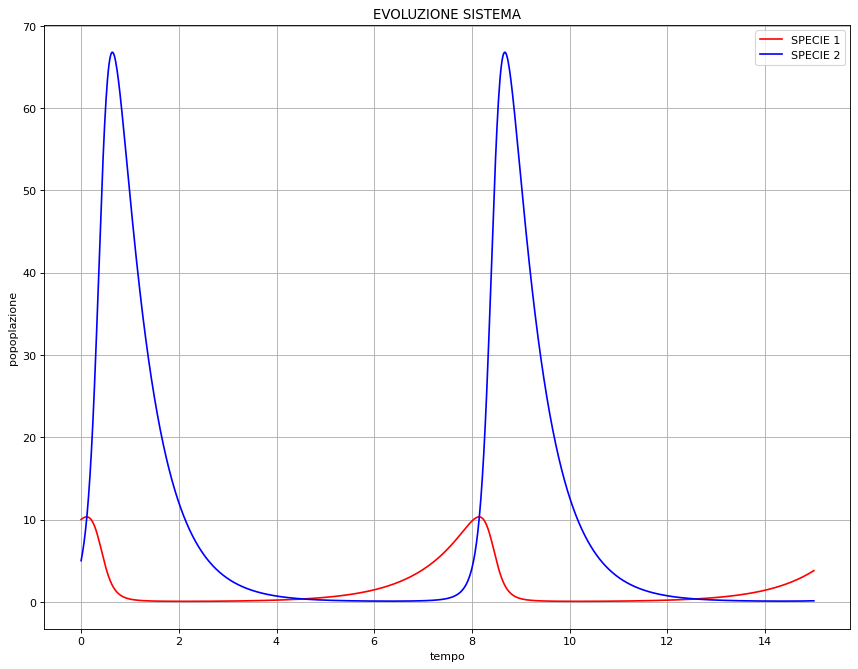

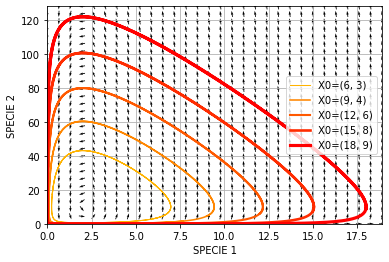

In [6]:
import numpy as np
import scipy.linalg as la
import math
from scipy import integrate
import matplotlib.pyplot as plt
import pylab as p
import math

from matplotlib.pyplot import figure

figure(figsize=(13, 10), dpi=80)



"""DEFINIAMO I PARAMETRI"""

a = 1.
b = 0.1
c = 1.5
d = 0.75

"""DEFINIAMO IL SISTEMA"""
def dX_dt(X,t=0): #X in questo caso è una lista bidimensionale
    return [  a*X[0] - b*X[0]*X[1]   ,  -c*X[1] + d*X[0]*X[1] ]

"""DEFINIAMMO LA MATRICE JACOBIANA"""
def jacobiano(X, t=0):
    return [[a -b*X[1],   -b*X[0]  ],
            [b*d*X[1] ,   -c +b*d*X[0]] ]


"""DEFINIAMO I DUE PUNTI DI EQUILIBRIO"""
X_f0 = [0.,0.] #primo punto stazionario
X_f1 = [c/(d*b), a/b] #secondo punto stazionario



"""PUNTO FISSO 1"""

"""VALUTIAMO LO JACOBIANO NEI DUE PUNTI DI EQUILIBRIO"""
A_f0 = jacobiano(X_f0)
print("\n")
print("matrice jacobiana valutata in (0,0):  ",A_f0)

autovalori_f0= la.eig(A_f0)
print("Autovalori della matrice jacobiana in (0,0): ",autovalori_f0[0])



print("\n")
"""PUNTO FISSO 2"""

A_f1 = jacobiano(X_f1)
print("matrice jacobiana valutata in (c/(d*b),a/b):  ",A_f1)

autovalori_f1= la.eig(A_f1)
print("Autovalori della matrice jacobiana in (0,0): ",autovalori_f1[0])

T_f1 = 2*math.pi/abs(autovalori_f1[0][0])
print("Periodo: ",T_f1)


"""RISOLVIAMO LE EQUAZIONI DIFFERENZIALI DEL MODELLO LOTKA VOLTERRA"""
t = np.linspace(0, 15,  1000) #array temporale
X0 = [10, 5]    #condizioni iniziali delle due specie (ad ogni t, corrisponde una coppia di valori, memorizzata in nell'array X
X = integrate.odeint(dX_dt,X0,t) #qui integriamo le equazioni, che abbiamo definito sopra



specie_1, specie_2 = X.T #con .T prendiamo entrambe le colonne e le trasponiamo
plt.plot(t, specie_1, 'r-', label='SPECIE 1')
plt.plot(t, specie_2 , 'b-', label='SPECIE 2')
plt.grid()
plt.legend(loc='best')
plt.xlabel('tempo')
plt.ylabel('popoplazione')
plt.title('EVOLUZIONE SISTEMA')
plt.show()



"""MOSTRIAMO LO SPAZIO DELLE FASI """

values  = np.linspace(0.3, 0.9, 5)  #posizioni di X0 tra X_f0 e X_f1
vcolors = p.cm.autumn_r(np.linspace(0.3, 1., len(values)))  # settiamo i colori

#raffiguriamo le traiettorie nello spazio delle fasi
for v, col in zip(values, vcolors):
    X0 = list(map(lambda x: x * v, X_f1))   #punti iniziali(X_f1 è una lista)
    X = integrate.odeint( dX_dt, X0, t)  #usiamo le diverse condizioni iniziali per integrare il sistema
    plt.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1])) #ricordiamo che iin X, ad ogni t, ci sono due valori: specie_1(t) e specie_2(t)

# definiamo una griglia e valutiamo la direzione in ciascun punto
ymax = p.ylim(ymin=0)[1]
xmax = p.xlim(xmin=0)[1]
nb_points= 30 #numero di frecce che vogliamo per ogni asse

x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)

X1 , Y1  = np.meshgrid(x, y)     #creiamo una griglia
DX1, DY1 = dX_dt([X1, Y1])     #calcoliamo l'andamento lungo le griglie
M = (np.hypot(DX1, DY1))       #calcoliamo la distanza tra due punti """SE TOGLI QUESTA PARTE LE FRECCE NON SONO NORMALIZZATE"""
M[ M == 0] = 1.                  #evitiamo la divisone per zero
DX1 /= M                         #normalizziamo i vettori
DY1 /= M

Q = p.quiver(X1, Y1, DX1, DY1, pivot='mid', cmap=p.cm.jet)
plt.xlabel("SPECIE 1")
plt.ylabel("SPECIE 2")
plt.legend()
plt.grid()
plt.xlim(0,xmax)
plt.ylim(0,ymax)
plt.show()

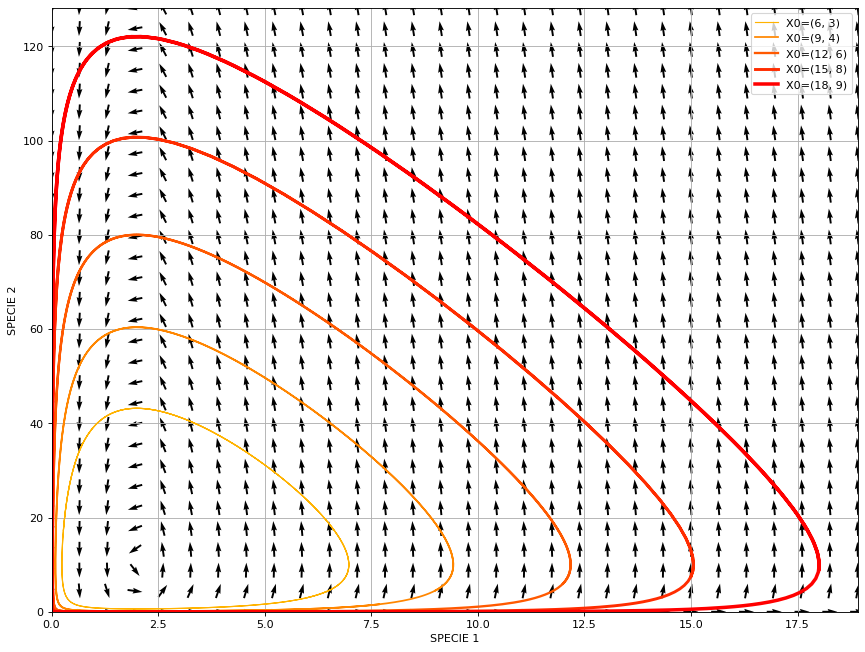

In [7]:
"""MOSTRIAMO LO SPAZIO DELLE FASI """
figure(figsize=(13, 10), dpi=80)
values  = np.linspace(0.3, 0.9, 5)  #posizioni di X0 tra X_f0 e X_f1
vcolors = p.cm.autumn_r(np.linspace(0.3, 1., len(values)))  # settiamo i colori

#raffiguriamo le traiettorie nello spazio delle fasi
for v, col in zip(values, vcolors):
    X0 = list(map(lambda x: x * v, X_f1))   #punti iniziali(X_f1 è una lista)
    X = integrate.odeint( dX_dt, X0, t)  #usiamo le diverse condizioni iniziali per integrare il sistema
    plt.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1])) #ricordiamo che iin X, ad ogni t, ci sono due valori: specie_1(t) e specie_2(t)

# definiamo una griglia e valutiamo la direzione in ciascun punto
ymax = p.ylim(ymin=0)[1]
xmax = p.xlim(xmin=0)[1]
nb_points= 30 #numero di frecce che vogliamo per ogni asse

x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)

X1 , Y1  = np.meshgrid(x, y)     #creiamo una griglia
DX1, DY1 = dX_dt([X1, Y1])     #calcoliamo l'andamento lungo le griglie
M = (np.hypot(DX1, DY1))       #calcoliamo la distanza tra due punti """SE TOGLI QUESTA PARTE LE FRECCE NON SONO NORMALIZZATE"""
M[ M == 0] = 1.                  #evitiamo la divisone per zero
DX1 /= M                         #normalizziamo i vettori
DY1 /= M

Q = p.quiver(X1, Y1, DX1, DY1, pivot='mid', cmap=p.cm.jet)
plt.xlabel("SPECIE 1")
plt.ylabel("SPECIE 2")
plt.legend()
plt.grid()
plt.xlim(0,xmax)
plt.ylim(0,ymax)
plt.show()